# INSTALL REQUIREMENTS

In [3]:
%pip install -r requirements.txt

     ---------------------------------------- 14.7/14.7 MB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 42.8/42.8 kB 524.6 kB/s eta 0:00:00
     -------------------------------------- 164.8/164.8 kB 1.1 MB/s eta 0:00:00
     ------------------------------------ 336.7/336.7 kB 948.9 kB/s eta 0:00:00
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=a04da90ab1a589f9772ee19094c966a5f0baf958321a9aedaced0b3bc23696b6
  Stored in directory: c:\users\corre\appdata\local\pip\cache\wheels\75\f7\28\77a076f1fa8cbeda61aca712815d04d7a32435f04a26a2dd7b
Successfully built prettytable
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip insta

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\corre\\AppData\\Roaming\\Python\\Python39\\site-packages\\~umpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



# IMPORT REQUIRED LIBRARIES

In [1]:
# IMPORTAMOS LIBRERIAS CLASICAS DE DATA ANALYSIS / DATA SCIENCE
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns


# IMPORTAMOS LIBRERIAS DE SQL
import sqlalchemy
import sqlite3 as db

from sqlalchemy import MetaData
from sqlalchemy_schemadisplay import create_schema_graph




c:\Users\corre\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\corre\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\corre\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## LET'S CREATE THE ENGINE CONNECTION WITH THE SQLITE DATABASE

#### REGULARLY I WORK WITH SQLALCHEMY AND MYSQL OR POSTGRESQL BUT I LIKE TO LEARN!


In [3]:
eng=sqlalchemy.create_engine("sqlite:///data/mock_db_v2.db")

#Let's try using sqlite3 as suggested
conn = db.connect("data/mock_db_v2.db")

### LET'S READ DESCRIBE INFO FOR EACH TABLE IN THE DATABASE

In [4]:
pd.read_sql("PRAGMA TABLE_INFO(ASSET)",con=conn)


,cid,name,type,notnull,dflt_value,pk
0,0,name,TEXT,0,None,0
1,1,createdAt,TEXT,0,None,0
2,2,updatedAt,TEXT,0,None,0
3,3,id,TEXT,0,None,0
4,4,campaignId,TEXT,0,None,0
5,5,sectorId,TEXT,0,None,0
6,6,fileType,TEXT,0,None,0
7,7,mimeType,TEXT,0,None,0
8,8,duration,REAL,0,None,0
9,9,frameCount,REAL,0,None,0


In [5]:
pd.read_sql("PRAGMA TABLE_INFO(ASSET_TYPE)",con=conn)


,cid,name,type,notnull,dflt_value,pk
0,0,id,TEXT,0,None,0
1,1,createdAt,TEXT,0,None,0
2,2,updatedAt,TEXT,0,None,0
3,3,name,TEXT,0,None,0
4,4,parentId,TEXT,0,None,0


In [6]:
pd.read_sql("PRAGMA TABLE_INFO(ASSET_COLOR)",con=conn)


,cid,name,type,notnull,dflt_value,pk
0,0,id,TEXT,0,None,0
1,1,createdAt,TEXT,0,None,0
2,2,updatedAt,TEXT,0,None,0
3,3,assetId,TEXT,0,None,0
4,4,color,TEXT,0,None,0
5,5,coverage,REAL,0,None,0


In [8]:
pd.read_sql("PRAGMA TABLE_INFO(ASSET_ASSET_TYPES)",con=conn)


,cid,name,type,notnull,dflt_value,pk
0,0,assetId,TEXT,0,None,0
1,1,assetTypeId,TEXT,0,None,0


# LET'S CREATE AN DATABASE SCHEMA TO UNDERSTAND BETTER ANY PRIMARY AND FOREIGN KEY DEPENDENCIES

#### This is optional but it looks good! 

In [9]:
# To execute the next scripts that build the database schema graph it is required to install the next software, follow this link :

# http://www.graphviz.org/Download_windows.php

# follow the instructions as stated in the next post:

# https://stackoverflow.com/questions/40632486/dot-exe-not-found-in-path-pydot-on-python-windows-7



import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [10]:
# set an object for database metadata
metadata_obj = MetaData(eng)

graph = create_schema_graph(metadata=metadata_obj,
   show_datatypes=False, # The image would get nasty big if we'd show the datatypes
   show_indexes=False, # ditto for indexes
   rankdir='LR', # From left to right (instead of top to bottom)
   concentrate=False # Don't try to join the relation lines together
)

# save the png file
graph.write_png('dbschema.png')

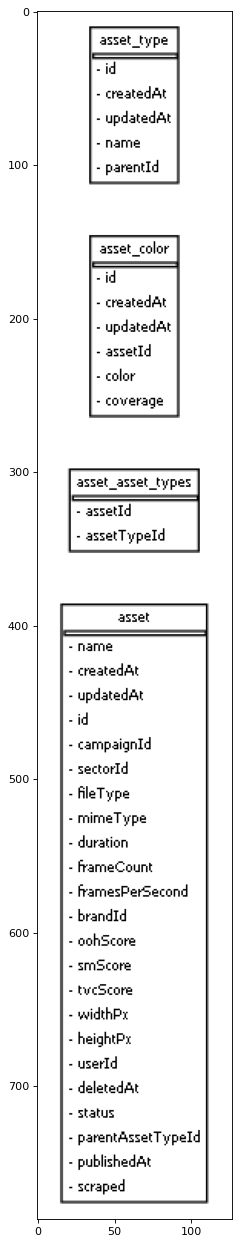

In [11]:
figure(figsize=(10, 20), dpi=80)
# Read Images
img = mpimg.imread('dbschema.png')
 
# Output Images
plt.imshow(img)


# AS WE CAN SEE THE TABLES ARE NOT LINKED WITH DEPENDENCIES FROM PRIMARY OR FOREIGN KEYS, THEREFORE I SUPPOSED THE DATABASE WAS BUILT LATER THAN THE TABLES


## DATA ANALYSIS WITH PANDAS

#### Q1: Average Social Media score (smScore) by the publishing year?

In [12]:
# First we need to get the Asset Table from Database into DataFrame
asset=pd.read_sql('SELECT * FROM ASSET',con=conn)
asset

,name,createdAt,updatedAt,id,campaignId,sectorId,fileType,mimeType,duration,frameCount,...,smScore,tvcScore,widthPx,heightPx,userId,deletedAt,status,parentAssetTypeId,publishedAt,scraped
0,magnum_2759815777838147496_1643215699.jpg,2022-04-11 15:34:58.219371,2022-04-11 17:24:03.509656,NWP01G0CM7284QXNH63AMAGE9ESQMSDE,2AE01G0CM32MPYEJY17PXNTTB70PV1EE,1EA01FYCYRJWE9ZY0ABBRQJ5D6G8H2QE,IMAGE,image/jpeg,NaN,NaN,...,69.9875,83.4673,1080,1080,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-01-26 13:48:19,0
1,magnum_2763223046697102910_1643621877.jpg,2022-04-11 15:34:58.198114,2022-04-11 17:24:03.511699,2W201G0CM7284RMCMCV85YFJFSREE0PR,2AE01G0CM32MPYEJY17PXNTTB70PV1EE,1EA01FYCYRJWE9ZY0ABBRQJ5D6G8H2QE,IMAGE,image/jpeg,NaN,NaN,...,69.4500,79.0945,1080,1080,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-01-31 06:37:57,0
2,magnum_2767782277064630862_1644165380.jpg,2022-04-11 15:34:58.237809,2022-04-11 17:24:03.513723,DW201G0CM72852RZJ0ZX731W66WZ3EAI,2AE01G0CM32MPYEJY17PXNTTB70PV1EE,1EA01FYCYRJWE9ZY0ABBRQJ5D6G8H2QE,IMAGE,image/jpeg,NaN,NaN,...,79.0500,73.4673,1080,1080,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-02-06 13:36:20,0
3,magnum_2765590769481605982_1643904132.jpg,2022-04-11 15:34:58.265869,2022-04-11 17:24:03.515921,PAA01G0CM7285TWFBS09TS10Y3R9MEA2,2AE01G0CM32MPYEJY17PXNTTB70PV1EE,1EA01FYCYRJWE9ZY0ABBRQJ5D6G8H2QE,IMAGE,image/jpeg,NaN,NaN,...,69.7750,78.5945,1080,1080,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-02-03 13:02:12,0
4,magnum_2772788415615013107_1644762158.jpg,2022-04-11 15:34:58.289795,2022-04-11 17:24:03.518241,SNI01G0CM7286AS31T05FQTZ1E2V329D,2AE01G0CM32MPYEJY17PXNTTB70PV1EE,1EA01FYCYRJWE9ZY0ABBRQJ5D6G8H2QE,IMAGE,image/jpeg,NaN,NaN,...,69.1250,67.7836,1080,1080,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-02-13 11:22:38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,banofacil_2031603578418701351_1556406040.jpg,2022-06-07 19:49:20.104243,2022-06-07 19:49:48.453825,5Ñ001G4ZVDRJEAZN2SV614K77PM13IDA,None,RF101FYCYRJWDDH1EPAZNXSH18MY30EA,IMAGE,image/jpeg,NaN,NaN,...,68.5125,70.7545,1080,1080,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-06-07 00:00:00,0
796,banofacil_2027678030513561510_1555938079.jpg,2022-06-07 19:49:20.198973,2022-06-07 19:49:49.428181,RQR01G4ZVDRJEQ65WB3K49DRD4QTYE1I,None,RF101FYCYRJWDDH1EPAZNXSH18MY30EA,IMAGE,image/jpeg,NaN,NaN,...,80.7250,82.0145,1080,1080,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-06-07 00:00:00,0
797,banofacil_2034275957141103716_1556724613.jpg,2022-06-07 19:49:19.937214,2022-06-07 19:49:49.889311,00R01G4ZVDRJFE2AW92QYP0T4FG9PI2A,None,RF101FYCYRJWDDH1EPAZNXSH18MY30EA,IMAGE,image/jpeg,NaN,NaN,...,61.3625,69.4200,1080,1080,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-06-07 00:00:00,0
798,banofacil_2033053363335949429_1556578868.jpg,2022-06-07 19:49:20.125422,2022-06-07 19:49:48.112687,1ID01G4ZVDRJFGRZVSH1CN1R8TJVDP2K,None,RF101FYCYRJWDDH1EPAZNXSH18MY30EA,IMAGE,image/jpeg,NaN,NaN,...,68.5125,63.0164,1080,1080,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-06-07 00:00:00,0


#### Convert Date columns into DateTime Format

In [13]:
# SET DATE COLUMNS TO DATETIME FORMAT

asset.publishedAt=pd.to_datetime(asset.publishedAt,format='%Y-%m-%dT%H:%M:%S.%f')
asset.createdAt=pd.to_datetime(asset.createdAt,format='%Y-%m-%dT%H:%M:%S.%f')
asset.updatedAt=pd.to_datetime(asset.updatedAt,format='%Y-%m-%dT%H:%M:%S.%f')
asset

,name,createdAt,updatedAt,id,campaignId,sectorId,fileType,mimeType,duration,frameCount,...,smScore,tvcScore,widthPx,heightPx,userId,deletedAt,status,parentAssetTypeId,publishedAt,scraped
0,magnum_2759815777838147496_1643215699.jpg,2022-04-11 15:34:58.219371,2022-04-11 17:24:03.509656,NWP01G0CM7284QXNH63AMAGE9ESQMSDE,2AE01G0CM32MPYEJY17PXNTTB70PV1EE,1EA01FYCYRJWE9ZY0ABBRQJ5D6G8H2QE,IMAGE,image/jpeg,NaN,NaN,...,69.9875,83.4673,1080,1080,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-01-26 13:48:19,0
1,magnum_2763223046697102910_1643621877.jpg,2022-04-11 15:34:58.198114,2022-04-11 17:24:03.511699,2W201G0CM7284RMCMCV85YFJFSREE0PR,2AE01G0CM32MPYEJY17PXNTTB70PV1EE,1EA01FYCYRJWE9ZY0ABBRQJ5D6G8H2QE,IMAGE,image/jpeg,NaN,NaN,...,69.4500,79.0945,1080,1080,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-01-31 06:37:57,0
2,magnum_2767782277064630862_1644165380.jpg,2022-04-11 15:34:58.237809,2022-04-11 17:24:03.513723,DW201G0CM72852RZJ0ZX731W66WZ3EAI,2AE01G0CM32MPYEJY17PXNTTB70PV1EE,1EA01FYCYRJWE9ZY0ABBRQJ5D6G8H2QE,IMAGE,image/jpeg,NaN,NaN,...,79.0500,73.4673,1080,1080,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-02-06 13:36:20,0
3,magnum_2765590769481605982_1643904132.jpg,2022-04-11 15:34:58.265869,2022-04-11 17:24:03.515921,PAA01G0CM7285TWFBS09TS10Y3R9MEA2,2AE01G0CM32MPYEJY17PXNTTB70PV1EE,1EA01FYCYRJWE9ZY0ABBRQJ5D6G8H2QE,IMAGE,image/jpeg,NaN,NaN,...,69.7750,78.5945,1080,1080,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-02-03 13:02:12,0
4,magnum_2772788415615013107_1644762158.jpg,2022-04-11 15:34:58.289795,2022-04-11 17:24:03.518241,SNI01G0CM7286AS31T05FQTZ1E2V329D,2AE01G0CM32MPYEJY17PXNTTB70PV1EE,1EA01FYCYRJWE9ZY0ABBRQJ5D6G8H2QE,IMAGE,image/jpeg,NaN,NaN,...,69.1250,67.7836,1080,1080,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-02-13 11:22:38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,banofacil_2031603578418701351_1556406040.jpg,2022-06-07 19:49:20.104243,2022-06-07 19:49:48.453825,5Ñ001G4ZVDRJEAZN2SV614K77PM13IDA,None,RF101FYCYRJWDDH1EPAZNXSH18MY30EA,IMAGE,image/jpeg,NaN,NaN,...,68.5125,70.7545,1080,1080,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-06-07 00:00:00,0
796,banofacil_2027678030513561510_1555938079.jpg,2022-06-07 19:49:20.198973,2022-06-07 19:49:49.428181,RQR01G4ZVDRJEQ65WB3K49DRD4QTYE1I,None,RF101FYCYRJWDDH1EPAZNXSH18MY30EA,IMAGE,image/jpeg,NaN,NaN,...,80.7250,82.0145,1080,1080,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-06-07 00:00:00,0
797,banofacil_2034275957141103716_1556724613.jpg,2022-06-07 19:49:19.937214,2022-06-07 19:49:49.889311,00R01G4ZVDRJFE2AW92QYP0T4FG9PI2A,None,RF101FYCYRJWDDH1EPAZNXSH18MY30EA,IMAGE,image/jpeg,NaN,NaN,...,61.3625,69.4200,1080,1080,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-06-07 00:00:00,0
798,banofacil_2033053363335949429_1556578868.jpg,2022-06-07 19:49:20.125422,2022-06-07 19:49:48.112687,1ID01G4ZVDRJFGRZVSH1CN1R8TJVDP2K,None,RF101FYCYRJWDDH1EPAZNXSH18MY30EA,IMAGE,image/jpeg,NaN,NaN,...,68.5125,63.0164,1080,1080,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-06-07 00:00:00,0


In [15]:
# Create a new column named publishedYear equivalent to the year value of the 'publishedAt' column

asset['publishedYear'] = asset.publishedAt.dt.year

# First a groupby table that summarize the averaged smScores per Year

print ("Table with Averaged Social Media Score per Published Year \n")
asset.groupby('publishedYear')['smScore'].mean()



Table with Averaged Social Media Score per Published Year 



publishedYear
2016    53.550000
2017    64.893056
2018    68.766964
2019    66.035487
2020    64.923989
2021    65.735504
2022    64.073580
Name: smScore, dtype: float64

In [16]:
# We can get the same information with a SQL QUERY

Query="""
SELECT Q1.publishedYear AS publishedYear,
       AVG(Q1.smScore) AS Averaged_smScore
FROM
  (SELECT strftime('%Y', publishedAt) AS publishedYear,
          smScore
   FROM ASSET) AS Q1
GROUP BY Q1.publishedYear
"""

print ("Table with Averaged Social Media Score per Published Year \n")

pd.read_sql(Query,con=conn)

Table with Averaged Social Media Score per Published Year 



,publishedYear,Averaged_smScore
0,2016,53.550000
1,2017,64.893056
2,2018,68.766964
3,2019,66.035487
4,2020,64.923989
5,2021,65.735504
6,2022,64.073580


Text(0.5, 0, 'Year of published Asset')

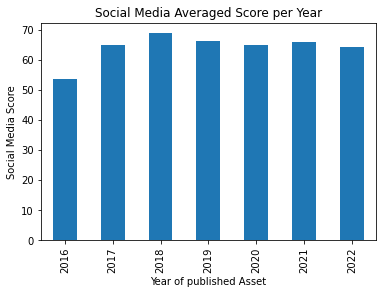

In [17]:
asset.groupby('publishedYear')['smScore'].mean().plot.bar()
plt.title('Social Media Averaged Score per Year')
plt.ylabel('Social Media Score')
plt.xlabel('Year of published Asset')

Text(0.5, 0, 'Year of published Asset')

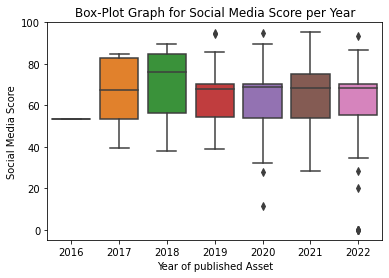

In [18]:
# To have a better insight about this data a boxplot per year is more suited

sns.boxplot(x=asset['publishedYear'],y=asset['smScore'])
plt.title('Box-Plot Graph for Social Media Score per Year')
plt.ylabel('Social Media Score')
plt.xlabel('Year of published Asset')


##### To sum up the observations that we have got from Bar Plot and Box Plot, one can say that since 2017 Social Media Score have been between 65 to nearly 70 on average. However, we should take under consideration other statics like interquantile distance, skewness and especially outliers. Outliers and wide interquantile distance could represent in too much volatility of expected results(in terms of income and convertion rates) for each asset


#### Q2: What are the most present colors in assets by publishing year?

In [19]:
# First a query that selects the PublishedYear and Color columns
Query="""
SELECT strftime('%Y', A.publishedAt) AS publishedYear,AC.COLOR FROM ASSET A
INNER JOIN ASSET_COLOR AC ON AC.ASSETID=A.ID
"""

color=pd.read_sql(Query,con=conn)
color

,publishedYear,color
0,2022,Beige
1,2022,Khaki
2,2022,Light Gray
3,2022,White
4,2022,Gray
...,...,...
871,2022,Black
872,2022,Green
873,2022,Light Blue
874,2022,Light Gray


In [58]:
# Create a Pivot table that counts the number of times a color is repeated each year

pivot_color_year=pd.pivot_table(color,index='color',columns='publishedYear',values='color',aggfunc=lambda x: len(x))
pivot_color_year

publishedYear,2016,2019,2020,2021,2022
color,,,,,
Aquamarine,NaN,NaN,NaN,1.0,NaN
Beige,NaN,1.0,1.0,6.0,7.0
Black,NaN,7.0,4.0,32.0,32.0
Blue,NaN,NaN,NaN,1.0,NaN
Bordeaux/ Fire Brick,NaN,1.0,7.0,20.0,8.0
Golden Rod,NaN,8.0,4.0,32.0,31.0
Gray,1.0,8.0,8.0,53.0,34.0
Green,1.0,18.0,13.0,69.0,41.0
Ivory,NaN,NaN,NaN,1.0,1.0


In [43]:
# The top 1 most present colors per published year are shown in the next table

top1_colors_year=pivot_color_year[['2016','2019','2020','2021','2022']].idxmax()
top1_colors_year

publishedYear
2016          Gray
2019         Green
2020    Light Gray
2021         Green
2022         Green
dtype: object

#### Now solve the question using SQL Query


In [80]:
Query="""
SELECT publishedYear, COLOR AS TOP_COLOR, MAX(COUNT) AS COUNT FROM
(SELECT publishedYear,COLOR,COUNT(*) AS COUNT FROM
(SELECT strftime('%Y', A.publishedAt) AS publishedYear,AC.COLOR FROM ASSET A
INNER JOIN ASSET_COLOR AC ON AC.ASSETID=A.ID)
GROUP BY publishedYear, COLOR)
GROUP BY publishedYear
"""

Query_top_colors=pd.read_sql(Query,con=conn)
Query_top_colors

,publishedYear,TOP_COLOR,COUNT
0,2016,Gray,1
1,2019,Green,18
2,2020,Light Gray,14
3,2021,Green,69
4,2022,Green,41


#### We can conclude that green could be the most influencial color through all years on assets database, maybe due to the new eco friendly trends

### Q3: What are the most present colors in assets by asset type?

In [17]:
Query="""SELECT Q2.NAME, Q2.COLOR, COUNT(*) FROM (SELECT Q1.ASSETID, Q1.NAME, AC.COLOR, AC.COVERAGE FROM (SELECT AAT.ASSETID,
       AAT.ASSETTYPEID,
       AT.NAME,
       AT.ID
FROM ASSET_ASSET_TYPES AAT
INNER JOIN ASSET_TYPE AT ON AT.ID=AAT.ASSETTYPEID) Q1
INNER JOIN ASSET_COLOR AC ON AC.ASSETID = Q1.ASSETID) Q2
GROUP BY Q2.NAME , Q2.COLOR
ORDER BY COUNT(*) DESC,Q2.NAME, Q2.COLOR 
"""

color_by_assettype_name=pd.read_sql(Query,con=conn)
color_by_assettype_name

,NAME,COLOR,COUNT(*)
0,Instagram,Green,136
1,Instagram,Light Gray,116
2,Instagram,Gray,100
3,Instagram,Sienna,91
4,Instagram,Golden Rod,72
5,Instagram,Black,70
6,Instagram,Rosy Brown,39
7,Instagram,Bordeaux/ Fire Brick,36
8,Instagram,Tan,29
9,Instagram,White,28


#### We can conclude that green could be the most influencial color on both the asset type (Faceboo and Instagram)

# NOTE: 

WITH THESE THREE ANSWER I COMPLETE THE MINIMUM REQUIREMENTS FOR RECRUITMENT TEST, HOWEVER I WOULD BE ANALYSING THE DATA DEEPLY TO DEVELOP NEW INSIGHTS ABOUT AD CAMPAIGNS AND UPDATE THE REPO WITH NEW RESULTS!